In [2]:
# 데이터수집 -> Crawler(Crawling+Scraping) => IR
# 0. 최소 robots.txt 확인하자!
# 1. 사이트이용약관
# 2. 개인정보 X
# 3. 저작물 무단 X
# 4. 너무 많은 요청 X  => 개인, 연구, 배포X, 공익O
# ============================================
# HTTP(S) -> HypterText(HTML), TCP/IP -> 신뢰성(Req/Resp 쌍)
# Status Code/reason -> 200, 400(내에러), 500(쟤에러)
# Method -> GET(R), POST(C), PUT(U), DELETE(D)
#                   ---------------(Body:params)
#           URL(Params)
# Params: ?key=value&key2=value
# 언제나 Bytes
# Response Header -> Content-type(Body 콘텐츠의 종류;MIME)
#                                 text/html -> RE, DOM, CSSOM
# Google, Naver, Daum; robots.txt 존재, 서비스 정책
# 403     200    200 -> Captcha
# -> User-agent 값(코드, Header Handling)
# -> X-..., Cookies, Referer, Tokens... 나중에


# (구현) HTTPlib -> urlib -> requests(*)
# Non-ASCII -> 한글 조합형(Trigem), 완성형(EUC-KR), 확장-완성형(CP949), 유니코드(UTF-8,...)
# HTML Entities => &인코딩(엔퍼센트 인코딩), &gt;
from urllib.request import urlopen, Request
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%EB%A6%AC%EB%82%98'

In [3]:
# url 요청
resp = urlopen(url)

In [4]:
# 요청 사항 읽기
# 캡챠 발생 (Daum: 200을 보내긴 하나 Captcha를 보낸다)
resp.read()

b'<script type="text/javascript"> location.replace("https://captcha.search.daum.net/show?redirect=https%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dtot%26DA%3DYZR%26t__nil_searchbox%3Dbtn%26sug%3D%26sugo%3D%26sq%3D%26o%3D%26q%3D%25EC%25B9%25B4%25EB%25A6%25AC%25EB%2582%2598"); </script>'

In [ ]:
# 다음 검색창 파라미터 구성
# w=tot& > 통합검색
# DA=YZR& 
# t__nil_searchbox=btn&
# sug=&
# sugo=&
# sq=&
# o=&
# q=%EC%B9%B4%EB%A6%AC%EB%82%98

In [3]:
# resp의 오류가 발생했을 때 처리하는 방법
# 함수는 200(resp), 400(forbbidon: raise, break), 500(retry)
# 리트라이 횟수가 너무 많으면 서버의 문제일 것이므로 적당히 잡음
# 또한 너무 많은 리트라이는 트래픽을 과도하게 높히므로 지양
from urllib.error import HTTPError
from time import sleep

def download(url, retrieds = 3):
    try:
        resp = urlopen(url)
        # robots.txt => 잘 안돌아감
    except HTTPError as e:
        # 500은 retry함.
        if 500 <= e.code:
            if retrieds > 0:
                sleep(3)
                download(url, retrieds-1)
            else:
                print('재방문 횟수 초과')
        else:
            print(e)
    return None if resp == None else resp.read()


In [10]:
download(url)

b'<script type="text/javascript"> location.replace("https://captcha.search.daum.net/show?redirect=https%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dtot%26DA%3DYZR%26t__nil_searchbox%3Dbtn%26sug%3D%26sugo%3D%26sq%3D%26o%3D%26q%3D%25EC%25B9%25B4%25EB%25A6%25AC%25EB%2582%2598"); </script>'

In [43]:
ua = 'test'
# f12로 개발자도구에 접속 후, console 창에 navigator.userAgent 검색하면 user agent를 얻을 수 있음.
#ua = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0" 

In [4]:
google_url = 'https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98&bshm=rime/1'

In [5]:
ua = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0" 
# 구글은 ua라는 유저 봇을 넣었을 때 forbbidon이 뜨지 않는다.
req = Request(url = google_url,
        headers = {'User-Agent':ua},
        method = 'GET')

In [6]:
req.headers, req.full_url, req.method, req.data

({'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0'},
 'https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98&bshm=rime/1',
 'GET',
 None)

In [7]:
resp = urlopen(req)

In [8]:
# ua를 바꾸니 charset이 UTF-8로 바뀐다.
resp.getheaders()

[('Content-Type', 'text/html; charset=UTF-8'),
 ('Date', 'Mon, 11 Sep 2023 23:43:32 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Strict-Transport-Security', 'max-age=31536000'),
 ('Content-Security-Policy',
  "object-src 'none';base-uri 'self';script-src 'nonce-ILM7YzJ2USJvBm76pKHBCg' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/fff"),
 ('Cross-Origin-Opener-Policy', 'same-origin-allow-popups; report-to="gws"'),
 ('Report-To',
  '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/fff"}]}'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2023-09-11-23; expires=Wed, 11-Oct-2023 23:43:32 GMT; path=/; domain=.google.com; Secure; SameSite=none'),
 ('Set-Cookie',
  'AEC=Ad49MVGhRUTf70gU1ONWtkFE_MH72RmY7T7b

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#52852;&#47532;&#45208; - Google &#44160;&#49353;</title><script nonce="0U3xFizj0cxoEFZWuWIwZQ">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.
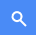
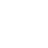
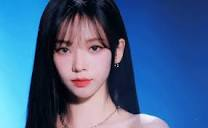
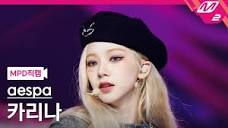
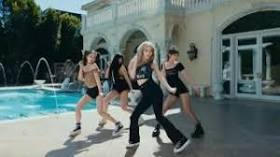
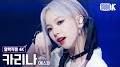
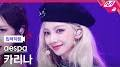
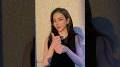
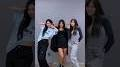

In [56]:
resp.read().decode('utf8', errors = 'ignore')

In [29]:
from html import unescape
# url에 title자리에 있는 Bytes 값이 한글의 ASCII code이다.
unescape('&#52852;&#47532;&#45208')

'카리나'

In [49]:
# 다음은 ua를 개인값을 넣지 않아도 utf-8을 리턴한다.
req = Request(url = url,
        headers = {'User-Agent':ua},
        method = 'GET')

In [50]:
resp = urlopen(req)

In [51]:
resp.getheaders()

[('Date', 'Mon, 11 Sep 2023 00:44:55 GMT'),
 ('Content-Type', 'text/html; charset=utf-8'),
 ('Transfer-Encoding', 'chunked'),
 ('Connection', 'close'),
 ('Vary', 'Accept-Encoding'),
 ('Set-Cookie',
  'uvkey=3d25e55a-0ed5-424f-bedb-82478f25c927; Path=/; Domain=search.daum.net; Expires=Thu, 08 Sep 2033 00:44:55 GMT; Max-Age=315360000'),
 ('Set-Cookie',
  '_ksk=3d25e55a-0ed5-424f-bedb-82478f25c927; Path=/; Domain=search.daum.net; Expires=Tue, 12 Sep 2023 00:44:55 GMT; Max-Age=86400'),
 ('Set-Cookie',
  'DTQUERY=%EC%B9%B4%EB%A6%AC%EB%82%98; Path=/; Domain=search.daum.net; Expires=Tue, 10 Sep 2024 00:44:55 GMT; Max-Age=31536000'),
 ('Set-Cookie',
  'ODT=IIMZ_NNSZ_TWAZ_1DVZ_DICZ_LB2Z_GG2Z; Path=/; Domain=search.daum.net; Expires=Tue, 10 Sep 2024 00:44:55 GMT; Max-Age=31536000'),
 ('Set-Cookie',
  'DDT=IVRZ_VOIZ_SNYZ_MS2Z; Path=/; Domain=search.daum.net; Expires=Tue, 10 Sep 2024 00:44:55 GMT; Max-Age=31536000'),
 ('Server', 'kws'),
 ('X-Frame-Options', 'SAMEORIGIN')]

In [93]:
# resp의 오류가 발생했을 때 처리하는 방법
# 함수는 200(resp), 400(forbbidon: raise, break), 500(retry)
# 리트라이 횟수가 너무 많으면 서버의 문제일 것이므로 적당히 잡음

def download(url, retrieds = 3, method = 'GET'):
    try:
        req = Request(url, 
                      headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"},
                      method = method)
        resp = urlopen(req)
        # robots.txt => 잘 안돌아감
    except HTTPError as e:
        # 500은 retry함.
        if 500 <= e.code:
            if retrieds > 0:
                sleep(3)
                download(url, method = method, retrieds = retrieds-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', req.heders())
            print('Respones', e)
    return None if resp == None else resp.read()


In [66]:
resp = download(google_url)

(bytes,
 '<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>카리나 - Google 검색</title><script nonce="z0Qw0oq0yoQZ2kzYFs92Cg">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'1mT-ZNKZK8Wj2roPoeSh4Ac\',kEXPI:\'31\',kBL:\'OJBY\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&
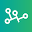
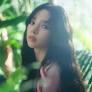
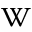
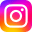
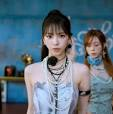
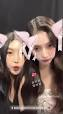
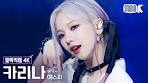
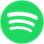
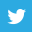
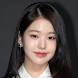
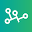
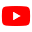
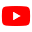
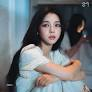
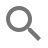

In [68]:
type(resp), resp.decode()

In [ ]:
resp = download('https://www.google.com/search?client=firefox-b-d&q=카리나')

# 한글을 바이트로 해당되는 코드로 바꿔야함
# Unicode -> Bytes(ASCII)
# TCP/IP - HTTP - 모든 통신은 항상 Bytes로 주고 받음
# Encoding/Decoding: &인코딩 방법을 사용한다.
"""
UnicodeEncodeError: 'ascii' codec can't encode characters in position 33-35: ordinal not in range(128)
"""

In [73]:
from urllib.parse import quote, quote_plus
# quote는 NON ASCII코드를 byte로 반환한다. 
quote('가')

'%EA%B0%80'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>가 - Google 검색</title><script nonce="o5P50xj1jB9-11KaJbEwxQ">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'42X-ZOuaI5uK2roPqM-q6AE\',kEXPI:\'31\',kBL:\'OJBY\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getAtt
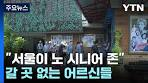
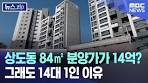
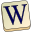
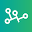
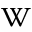
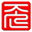
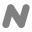
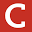
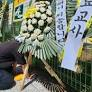

In [76]:
resp = download('https://www.google.com/search?client=firefox-b-d&q=%EA%B0%80')
resp.decode()

In [77]:
# 띄어쓰기 또한 quote, quote_plus에 따라 반환되는 bytes 양식이 다르다.
quote('a b'), quote('가 나'), quote_plus('a b'), quote_plus('가 나')

('a%20b', '%EA%B0%80%20%EB%82%98', 'a+b', '%EA%B0%80+%EB%82%98')

In [ ]:
# 카 리 나로 구글에 검색했을 경우
"""
%EC%B9%B4+%EB%A6%AC+%EB%82%98
"""
# + 방식으로 적었다.
https://www.google.com/search?q=%EC%B9%B4+%EB%A6%AC+%EB%82%98&client=firefox-b-d&sca_esv=564225123&ei=ZmD-ZIOWOZji2roPsrGpoAM&ved=0ahUKEwiD4erTp6GBAxUYsVYBHbJYCjQQ4dUDCA8&uact=5&oq=%EC%B9%B4+%EB%A6%AC+%EB%82%98&gs_lp=Egxnd3Mtd2l6LXNlcnAiC-y5tCDrpqwg64KYMggQABgIGB4YDzICECYyAhAmMgIQJkiPPlCaF1j4M3AFeAGQAQCYAacBoAGcA6oBAzAuM7gBA8gBAPgBAcICChAAGEcY1gQYsAPCAgcQABiKBRhDwgIFEAAYgATCAgQQABgD4gMEGAAgQYgGAZAGCg&sclient=gws-wiz-serp&bshm=rime/1

In [79]:
from urllib.parse import unquote, unquote_plus
# unquote는 byte 타입의 문자를 다시 바꿔준다.
unquote(quote('가')), unquote(quote_plus('가 나'))

('가', '가+나')

In [80]:
# +는 다시 16진수로 보인다.
quote('a + b'), quote_plus(('a + b'))

('a%20%2B%20b', 'a+%2B+b')

In [89]:
url

'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%EB%A6%AC%EB%82%98'

In [96]:
# url에 검색하기 위한 파라미터를 찾기 위해서
# 다음과 같은 방식으로 반복한다.
params = []

for row in url.split('?')[-1].split('&'):
    if row.split('=')[0] == 'q':
        print(row)
        params.append('='.join(['q', quote('카 리 나')]))
    else:
        params.append(row)
url.split('?')[0] + '?' + '&'.join(params)
# 다운로드도 잘 된다.
# download(url.split('?')[0] + '?' + '&'.join(params)).decode()

q=%EC%B9%B4%EB%A6%AC%EB%82%98


'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%20%EB%A6%AC%20%EB%82%98'

In [95]:
# 매번 for문을 돌려서 query의 값을 찾는 것을 매우 번거로운 일이다.
# 따라서 parse_qs를 이용하여 간단하게 추출한다.

from urllib.parse import urlparse, urlunparse
from urllib.parse import parse_qs, urlencode

In [101]:
# urlparse을 사용하면 url을 분해할 수 있다.
print(google_url)
urlparse(google_url)
# scheme = https/http/ftp
# netloc = 호스트 주소
# query = 파라미터
# fragment = 내부 링크 #[id] 값을 붙히면 된다.

https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98&bshm=rime/1


ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98&bshm=rime/1', fragment='')

In [103]:
# url을 접속할 때 필요한 요소를 각각 확인한다.
urls = urlparse(google_url)
urls.scheme, urls.netloc, urls.path, urls.query

('https',
 'www.google.com',
 '/search',
 'client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98&bshm=rime/1')

In [106]:
urlunparse(('http','www.google.com','/path','','key=value',''))

'http://www.google.com/path?key=value'

In [112]:
from urllib.parse import parse_qsl
# 딕셔너리로 쪼겜
parse_qs(urls.query)
# 리스트의 튜플로 쪼겜
parse_qsl(urls.query)

[('client', 'firefox-b-d'), ('q', '카리나'), ('bshm', 'rime/1')]

In [118]:
# 특정 key value 바꾸기
pqs = parse_qs(urls.query)
pqs['q'] = '카 리 나'

In [122]:
# 리스트 내 튜플 방식과, dict 방식 둘 다 사용가능하다.
urlencode([('q', '카리나')])
urlencode({'q': '카리나'})

'q=%EC%B9%B4%EB%A6%AC%EB%82%98'

In [123]:
params = {
    'q': ''
}
params['q'] = '카리나'

In [129]:
# url 재조합
urlunparse((*urlparse(google_url)[:4], urlencode(params),''))

'https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98'

In [131]:
params = {
    'q': ''
}
params['q'] = '뉴진스'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>뉴진스 - Google 검색</title><script nonce="xYuKsFPgRn297PRE6fr4BA">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'sG3-ZOaWCa6l2roPrt2d0AQ\',kEXPI:\'31\',kBL:\'OJBY\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getA
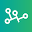
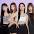
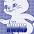
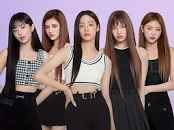
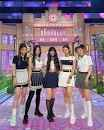
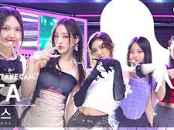
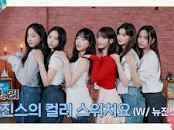
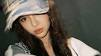
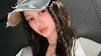
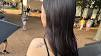
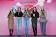
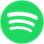
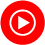
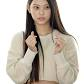
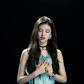
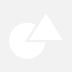
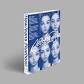
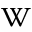
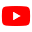
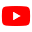
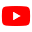
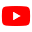
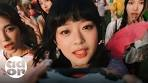

In [132]:
# 검색 결과는 파라미터만 수정하면 바로 가져올 수 있다.
resp = download(urlunparse((*urlparse(google_url)[:4], urlencode(params),'')))
resp.decode()

In [137]:
# 네이버 -> QueryString 쪼개서 params에 넣고,
# 검색키워드를 하고 싶은 키워드로 바꿔서 URL을 합치고(urlencode -> urlunparse)해서 
# 검색 결과 가져오기 (HTML - HEAD - TITLE)

naver_url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%89%B4%EC%A7%84%EC%8A%A4'
naver_urls = urlparse(naver_url)
naver_urls

ParseResult(scheme='https', netloc='search.naver.com', path='/search.naver', params='', query='where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%89%B4%EC%A7%84%EC%8A%A4', fragment='')

In [163]:
parse_qs(naver_urls.query)['where'], parse_qs(naver_urls.query)['sm'], parse_qs(naver_urls.query)['fbm'],  parse_qs(naver_urls.query)['ie']

(['nexearch'], ['top_hty'], ['0'], ['utf8'])

In [200]:
urlparse(naver_url)

ParseResult(scheme='https', netloc='search.naver.com', path='/search.naver', params='', query='where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%89%B4%EC%A7%84%EC%8A%A4', fragment='')

In [224]:
params = {'where':'nexearch',
          'query': '뉴진스'}
urlencode(params)

'where=nexearch&query=%EB%89%B4%EC%A7%84%EC%8A%A4'

In [222]:
urlunparse((*urlparse(naver_url)[:3], 
            '', 
            urlencode(params),
            ''))

'https://search.naver.com/search.naver?query=%EB%89%B4%EC%A7%84%EC%8A%A4'

In [186]:
url = 'https://search.naver.com/search.naver'
params = {'where':'nexearch',
          'query': '뉴진스'}
print(url + '?' + urlencode(params))
n_url = download(url + '?' + urlencode(params))
n_url.decode()

https://search.naver.com/search.naver?where=nexearch&query=%EB%89%B4%EC%A7%84%EC%8A%A4


'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="뉴진스 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'뉴진스\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'뉴진스\'의 네이버 통합검색 결과입니다."> <title>뉴진스 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.n

In [223]:
# 위의 모든 과정을 Daum 바꿔보기
# QS 확인 -> Parsing
# URL unparse
# 1. 키워드 바꿔서 통합검색
# 2. image 검색
# 3. page 검색

daum_url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%EB%A6%AC%EB%82%98'
urlparse(daum_url)

ParseResult(scheme='https', netloc='search.daum.net', path='/search', params='', query='w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%EB%A6%AC%EB%82%98', fragment='')

In [226]:
parse_qs(urlparse(daum_url).query)

{'w': ['tot'], 'DA': ['YZR'], 't__nil_searchbox': ['btn'], 'q': ['카리나']}

In [243]:
urlparse(daum_url)[:4]
params = {'w': 'tot', # img는 tot > img, 다음페이지는 tot > fusion으로
          'q': '엄준식',
          } # 'p' : 2}, 여러 페이지 

In [258]:
new_urls= urlunparse((*urlparse(daum_url)[:4], 
            urlencode(params),
            ''))#''))

In [246]:
resp = download(new_urls)
resp.decode()

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="pc win firefox">\n    \n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n    <meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="autocomplete" content="off" />\n    <meta name="referrer" content="always">\n    <meta name="format-detection" content="telephone=no" />\n    <meta property="og:title" content="엄준식 &ndash; Daum 검색" />\n    <meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%EC%97%84%EC%A4%80%EC%8B%9D" />\n    <meta property="og:description" content="Daum 검색에서 엄준식에 대한 최신정보를 찾아보세요." />\n    <meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n    <meta property="og:site_name" content="다음검색" />\n    <title>엄준식 &ndash; Daum 검색</title>\n\n    \

In [250]:
from urllib.parse import urljoin
urljoin('https://www.google.com/search?q=엄준식', '?q =v') # ?q = v면 query값을 v로 바꿔준다, '#frag
# 절대주소: URL(I) (http:// ~)
# 상대주소: path (중간에 path)
# 서버/path

'https://www.google.com/search?q =v'

In [251]:
urljoin('https://www.google.com/search?q=엄준식',
        'https://search.naver.com') # 도메인 간단하게 바꿔준다


'https://search.naver.com'

In [ ]:
# requests
# 1. request 함수가 분기다. > urlopen이 각 기능(method)별 함수로 쪼개진다.
#   가장 문제가 되는 것 > non - ASCII일때, headers, post에서 body영역의 data
# 2. response 객체 생김, raw - bytes => 쓰기 편하게 바뀐다
# 3. urllib.parse있는 동작들이 생긴다.
# 4. user-agent값이 필요 X > Request 객체가 감싸주고 있어서 필요없음

In [254]:
from requests import request, get, post

In [260]:
# GET이라는 함수
google_url_bs = 'https://www.google.com/search'

resp = request(method = 'GET', url = google_url_bs,
                params= {'q': '카리나'}) # 딕셔너리, 튜플+리스트, byte 3개다 사용 가능
# get()
# post(method = 'POST', params가 없고, data가 있다)

In [261]:
resp.status_code, resp.reason, resp.headers

(200,
 'OK',
 {'Content-Type': 'text/html; charset=ISO-8859-1', 'Date': 'Mon, 11 Sep 2023 02:22:05 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-MehH87XRK1oNb29XLBjMHA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-09-11-02; expires=Wed, 11-Oct-2023 02:22:05 GMT; path=/; domain=.google.com; Secure, AEC=Ad49MVGMrmyto-Adj2M0ARrn3MI2zMMAIcue35C9zzvPNCyD1K9nT6rDwQ; expires=Sat, 09-Mar-2024 02:22:05 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=ZtyrHCPVkU2bBq9uYyh6FfLrUSVFeI0Y9Y5eIY1rdyJHrSKaoQ78CjrwNmi8CXwHAH8PXvdtQ3Kh6Ubp0ohHkpoRRRyVysE56q6eUzWWYQI7r--cTSRqFXFfriGZAUo8Of88XzX8_UKUkJ1al-d

In [263]:
type(resp)
# 리퀘스트 객체 없이 기본적인 헤더값이 포함되어 있어서
# user-agent 값을 사용하지 않고 request 객체로 된다.
resp.request.headers

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

b'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#52852;&#47532;&#45208; - Google &#44160;&#49353;</title><script nonce="MehH87XRK1oNb29XLBjMHA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window
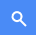
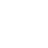
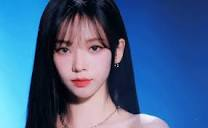
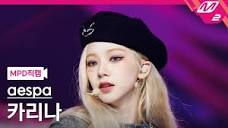
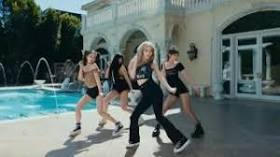
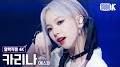
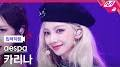
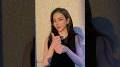
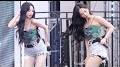
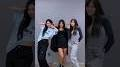

In [264]:
resp.content # .read()

In [265]:
# 헤더를 바꾸면 utf-8로 볼 수 있다.
resp.encoding

'ISO-8859-1'

In [270]:
resp = request(method = 'GET', 
               url = google_url_bs,
               params= {'q': '카리나'}, 
               headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}) # 딕셔너리, 튜플, 리스트 3개다 사용 가능
resp.encoding

'UTF-8'

In [273]:
# request 객체라서 값을 바꾸고 싶으면 encoding라든지 원하는 것으로 바꿀 수 있다.
resp.encoding = 'utf-8' # 'cp949', 'iso-8859-1'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>카리나 - Google 검색</title><script nonce="OixJNd9BpnqBXjYP8VtxNw">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'8nr-ZLKYCILt2roPubixoAM\',kEXPI:\'31\',kBL:\'OJBY\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getA
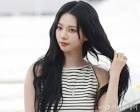
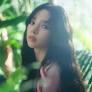
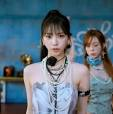
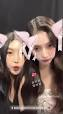
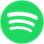
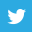
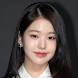
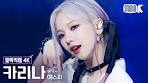
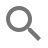

In [274]:
resp.text

In [275]:
# params를 list에 tuple로 묶은 값을 주어도 된다.
resp = request(method = 'GET', url = google_url_bs,
                params= [('q', '카리나')], headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}) # 딕셔너리, 튜플, 리스트 3개다 사용 가능

In [277]:
resp.request.url

'https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98'

In [278]:
# params를 byte를 넣어도 된다.
resp = request(method = 'GET',
               url = google_url_bs,
               params= urlencode([('q', '카리나')]), 
               headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}) # 딕셔너리, 튜플, 리스트 3개다 사용 가능

In [282]:
resp.request.url, resp.request.headers, resp.headers

('https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98',
 {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'},
 {'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Mon, 11 Sep 2023 02:30:12 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Strict-Transport-Security': 'max-age=31536000', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-eR7DED5hFu-j9B5T5czt-A' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/fff", 'Cross-Origin-Opener-Policy': 'same-origin-allow-popups; report-to="gws"', 'Report-To': '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/fff"}]}', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'br', 'Server': 'gws', 'X-XSS-Prote

In [284]:
# http://httpbin.org/status/[code]
# status 코드에 따라서 어떻게 반응하는지 확인할 수 있는 연습 사이트
resp = get('https://www.httpbin.org/status/403')

In [285]:
resp.status_code

403

In [292]:
from requests.exceptions import HTTPError
try:
    resp.raise_for_status()
except HTTPError as e:
    # 오류를 점검하고 싶을 때 사용함
    print(e.response.request.headers)

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [297]:
# 앞에서 나온 함수들이 request로 엮여서 아래의 함수처럼 사용된다.
# 사용하기 편하다.
def download(url, retrieds = 3, method = 'GET'):
    try:
        resp = request(method, url,
                      headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}
                      )
        resp.raise_for_status()
        # robots.txt => 잘 안돌아감
    except HTTPError as e:
        # 아니면,
        # if resp.status_code != 200:
        if 500 <= e.response.status_code:
            if retrieds > 0:
                sleep(3)
                download(url, method = method, retrieds = retrieds-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Respones', e.response.headers)
    return resp

In [300]:
# status_code를 꼭 확인해야한다.
download('https://www.httpbin.org/status/400').status_code

Request {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}
Respones {'Date': 'Mon, 11 Sep 2023 02:43:18 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


400

In [301]:
from requests.compat import * # urllib에서 사용한 것들은 여기서 찾아서 쓰면 된다.

In [302]:
resp = download('https://www.httpbin.org/get?key=value')

In [303]:
resp.status_code, resp.headers

(200,
 {'Date': 'Mon, 11 Sep 2023 02:44:30 GMT', 'Content-Type': 'application/json', 'Content-Length': '409', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'})

In [305]:
print(resp.text)
 #json 형식: JAVAScript Object Notation > array양식과 object 양식으로 되어있다
          # XML(eXtensible Markup Langugie)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "www.httpbin.org", 
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0", 
    "X-Amzn-Trace-Id": "Root=1-64fe7f0d-6a5d01305c937d676b78f9b9"
  }, 
  "origin": "163.152.3.168", 
  "url": "https://www.httpbin.org/get?key=value"
}



In [307]:
import json

# json.load(text, fp를 dict로 표현할 때 씀)
# json.dump(dict => text, fp로 표현함)
temp = json.loads('{"key":"value"}') # 파이썬에서 사용하는 로테이션 > 딕셔너리

In [308]:
json.dumps(temp) # 자바스크립트에서 사용하는 로테이션

'{"key": "value"}'

In [311]:
json.loads(resp.text)['args'] # 파이선 object로 변환

{'key': 'value'}

In [312]:
resp.json()['args']

{'key': 'value'}

In [315]:
resp.request.body

In [330]:
# body를 받기 위해 다운로드를 바꿔본다

def download(url, params = {}, method = 'GET', retrieds = 3):
    try:
        # params와 data를 method에 따라 정의함.
        resp = request(method, 
                       url, 
                       # get은 URL에 모든 매개변수를 배치한다
                       params= params if method == 'GET' else {} ,
                       # post는 모든 매개변수를 본문에 배치한다
                       data = params if method == 'POST' else {},
                       headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}
                      )
        # raise_for_status는 요청/응답 코드가 200이 아니면 예외를 발생              
        resp.raise_for_status()
        # robots.txt => 잘 안돌아감
    except HTTPError as e:
        # 아니면,
        # if resp.status_code != 200:
        if 500 <= e.response.status_code:
            if retrieds > 0:
                sleep(3)
                download(url, method = method, params = params, retrieds = retrieds-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Respones', e.response.headers)
    return resp

In [331]:
# body를 받기 위해 다운로드를 바꿔본다
resp = download("https://www.httpbin.org/post", {'key':'value'}, method = 'POST')
resp.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '9',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'www.httpbin.org',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0',
  'X-Amzn-Trace-Id': 'Root=1-64fe8228-0b8882c820e33f52026c31e3'},
 'json': None,
 'origin': '163.152.3.168',
 'url': 'https://www.httpbin.org/post'}

In [333]:
korea_url = 'https://korea.ac.kr/search/search.jsp'
resp = download(korea_url, {'query':'고려대'}, 'POST')

In [336]:
print(resp.status_code), print(resp.headers)

200
{'Date': 'Mon, 11 Sep 2023 03:02:36 GMT', 'Set-Cookie': 'MAIN_JSESSIONID=pGlGk2DMp1dJZ191bZnrffnfdJ6vJvvp1gy1wmCTGMlCfL710yRc!-22109481; path=/; HttpOnly', 'X-Powered-By': 'Servlet/2.5 JSP/2.1', 'Content-Security-Policy': '', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1;mode=block', 'Keep-Alive': 'timeout=15, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/html; charset=utf-8'}


(None, None)

In [337]:
# 한글로 보낸 query값이 byte로 바뀌어서 url이 만들어졌다.
resp.request.url, resp.request.body

('https://korea.ac.kr/search/search.jsp', 'query=%EA%B3%A0%EB%A0%A4%EB%8C%80')

In [339]:
google_sht = 'https://www.google.com/search?'
resp = download(google_url_bs, {'q':'카리나'})

In [340]:
resp.status_code, resp.headers

(200,
 {'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Mon, 11 Sep 2023 03:05:07 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Strict-Transport-Security': 'max-age=31536000', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-vbGZZzMKbjrEhrAum7fjhA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/fff", 'Cross-Origin-Opener-Policy': 'same-origin-allow-popups; report-to="gws"', 'Report-To': '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/fff"}]}', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'br', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Transfer-Encoding': 'chunked', 'Set-Cookie': '1P_JAR=2023-09-11-03; expires=Wed, 11-Oct-2023 03:05:07 GMT; path=/; domain=.google.com; Secure; SameSite=none, AEC=Ad49MVH8ElxfbiztDs1_DO7-L0Yb_F7hGCF

In [341]:
resp.encoding

'UTF-8'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>카리나 - Google 검색</title><script nonce="vbGZZzMKbjrEhrAum7fjhA">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'44P-ZIqTKZ3N2roP84W1kAw\',kEXPI:\'31\',kBL:\'OJBY\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getA
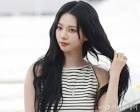
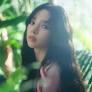
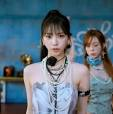
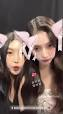
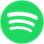
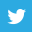
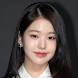
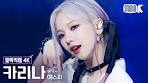
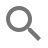

In [342]:
# 본문
resp.text

In [ ]:
# 지금까지 한 것 > HTTP에 요청을 보내서 request.body 사용유무, bytes을 확인하고,
#                 response.status_code, headers 등을 확인했다.
# 지금부터 본문 메세지를 확인하는 법을 본다.

print(resp.text)

In [ ]:
# 본문을 해석(parsing) > 할 수 있는 방법) RE(정규식), DOM, CSSOM
# 정규식(Regular Expression)
# https://regexr.com/ (RE 테스트 사이트)